PyGSLIB
========

QQ and PP plots
---------------





In [1]:
#general imports
import matplotlib.pyplot as plt   
import pygslib as gslib  
import numpy as np

#make the plots inline
%matplotlib inline  

Getting the data ready for work
---------
If the data is in GSLIB format you can use the function `gslib.read_gslib_file(filename)` to import the data into a Pandas DataFrame. 


In [2]:
#get the data in gslib format into a pandas Dataframe
cluster= gslib.read_gslib_file('../datasets/cluster.dat')  
true= gslib.read_gslib_file('../datasets/true.dat')  

true['Declustering Weight'] = 1


## Testing qpplt

This is not plotting results but is handy to get declustered bins for plots 



In [3]:
print gslib.__plot.qpplt.__doc__

vr1,vr2,error = qpplt(qqorpp,npts,va1,va2,wt1,wt2,[n1,n2])

Wrapper for ``qpplt``.

Parameters
----------
qqorpp : input int
npts : input int
va1 : input rank-1 array('d') with bounds (n1)
va2 : input rank-1 array('d') with bounds (n2)
wt1 : input rank-1 array('d') with bounds (n1)
wt2 : input rank-1 array('d') with bounds (n2)

Other Parameters
----------------
n1 : input int, optional
    Default: len(va1)
n2 : input int, optional
    Default: len(va2)

Returns
-------
vr1 : rank-1 array('d') with bounds (npts)
vr2 : rank-1 array('d') with bounds (npts)
error : int



##QQ-Plot

In [4]:
npoints = len(cluster['Primary'])
true['Declustering Weight'] = 1


#using declustering wight
parameters_qpplt = {
     'qqorpp'  : 0,                             # Q-Q plot (qqorpp=0); P-P plot (qqorpp=1)
      'npts'   : npoints,                       # number of points to use on the Q-Q or P-P plot (should not exceed the smallest number of data in data1 / data2
       'va1'   : cluster['Primary'],            # array('d') with bounds (nd)
       'va2'   : true['Primary'],               # array('d') with bounds (nd)
       'wt1'   : cluster['Declustering Weight'],# array('d') with bounds (nd)
       'wt2'   : true['Declustering Weight']}   # array('d') with bounds (nd)
    
vr1a,vr2a,error = gslib.__plot.qpplt(**parameters_qpplt)

print 'error ? ',  error != 0

#ignoring declustering wight
cluster['No Weight'] =1
parameters_qpplt['wt1'] =  cluster['No Weight']
       
vr1b,vr2b,error = gslib.__plot.qpplt(**parameters_qpplt)

print 'error ? ',  error != 0


error ?  False
error ?  False


<bound method Figure.show of <matplotlib.figure.Figure object at 0x7fd2ffbe4f90>>

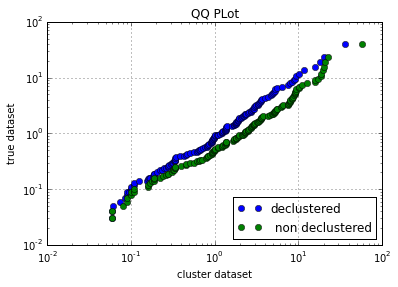

In [5]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (vr1a, vr2a, 'o', label = 'declustered')
plt.plot (vr1b, vr2b, 'o', label = ' non declustered')
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel ('cluster dataset')
ax.set_ylabel ('true dataset')
ax.set_title ('QQ PLot')
plt.legend(loc=4)
plt.grid(True)
fig.show


## PP-PLot

In [6]:
npoints = len(cluster['Primary'])
true['Declustering Weight'] = 1


#using declustering wight
parameters_qpplt = {
     'qqorpp'  : 1,                             # Q-Q plot (qqorpp=0); P-P plot (qqorpp=1)
      'npts'   : npoints,                       # number of points to use on the Q-Q or P-P plot (should not exceed the smallest number of data in data1 / data2
       'va1'   : cluster['Primary'],            # array('d') with bounds (nd)
       'va2'   : true['Primary'],               # array('d') with bounds (nd)
       'wt1'   : cluster['Declustering Weight'],# array('d') with bounds (nd)
       'wt2'   : true['Declustering Weight']}   # array('d') with bounds (nd)
    
vr1a,vr2a,error = gslib.__plot.qpplt(**parameters_qpplt)

print 'error ? ',  error != 0

#ignoring declustering wight
cluster['No Weight'] =1
parameters_qpplt['wt1'] =  cluster['No Weight']
       
vr1b,vr2b,error = gslib.__plot.qpplt(**parameters_qpplt)

print 'error ? ',  error != 0


error ?  False
error ?  False


<bound method Figure.show of <matplotlib.figure.Figure object at 0x7fd2ffbe4990>>

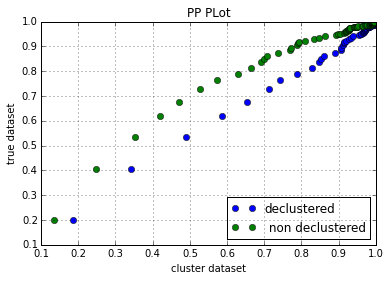

In [7]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
plt.plot (vr1a, vr2a, 'o', label = 'declustered')
plt.plot (vr1b, vr2b, 'o', label = ' non declustered')
#ax.set_xscale('log')
#ax.set_yscale('log')
ax.set_xlabel ('cluster dataset')
ax.set_ylabel ('true dataset')
ax.set_title ('PP PLot')
plt.legend(loc=4)
plt.grid(True)
fig.show